# Video games analysis
This dataset contains a list of video games with sales greater than 100,000 copies.
<br>Fields include:
<br>Rank - Ranking of overall sales
<br>Name - The games name
<br>Platform - Platform of the games release (i.e. PC,PS4, etc.)
<br>Year - Year of the game's release
<br>Genre - Genre of the game
<br>Publisher - Publisher of the game
<br>NA_Sales - Sales in North America (in millions)
<br>EU_Sales - Sales in Europe (in millions)
<br>JP_Sales - Sales in Japan (in millions)
<br>Other_Sales - Sales in the rest of the world (in millions)
<br>Global_Sales - Total worldwide sales.

### Let's start by importing our main libraries 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Our file is a csv file called 'vgsales.csv'

In [314]:
df = pd.read_csv('vgsales.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


By using info we are getting info about our DataFrame, we can see our columns, and we also can see that we don't have 
any nulls in our DataFrame(yay!), and also our Data types.
<br>now let's use .describe method to get some descp statistics information.

In [266]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [273]:
df['Year'].min()

1980.0

In [274]:
df['Year'].max()

2020.0

We can identify that NA_Sales is the best selling area and other_Sales in the worst.
Another thing we can identify is that the Years in our DF is between 1980-2020, the years median is 2007, so it's easy to realize that the games indusrty got way stronger trough 1980-2020, half of the sales made from 1980-2007(27 years) and the other half made between 2007-2020(13 years)! the sales has been doubled! 
<br>Let's check the head of our DF.

In [284]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


We can make our DF more comfortable by making the Rank column as our index. 

In [315]:
df=df.set_index('Rank')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


It's seems that out DF is sorted by the sales, let's make sure it's true.

In [285]:
df.sort_values(by='Global_Sales',ascending=False).head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Seems that our DF is pretty easy to work with, no data cleaning is needed, so let's start doing EDA.
<br>First I would like to see what is the most common Platform,Genre,year and Publisher(the DF is already sorted by the most popular game so I gave up on this column).

In [320]:
df['Platform'].nunique()

31

In [319]:
df['Platform'].value_counts().head(5)

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64

<AxesSubplot:>

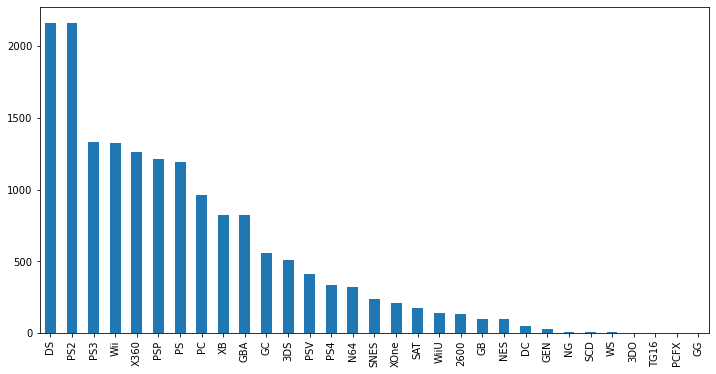

In [41]:
df['Platform'].value_counts().plot(kind='bar',figsize=(12,6))

DS(2163) and PS2(2162) are by far the most common platforms for video games.

In [321]:
df['Genre'].nunique()

12

In [322]:
df['Genre'].value_counts().head()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64

<AxesSubplot:>

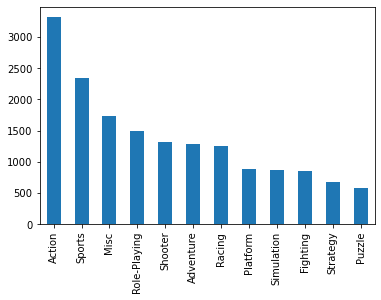

In [18]:
df['Genre'].value_counts().plot(kind='bar')

Action is the most common and after him Sports and Music.

In [324]:
df['Year'].value_counts().head()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
Name: Year, dtype: int64

<AxesSubplot:>

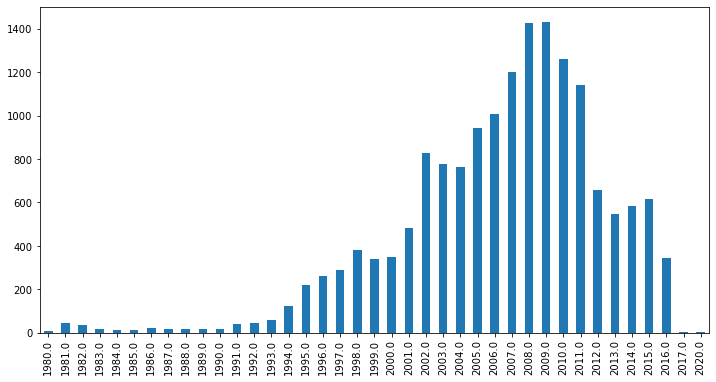

In [331]:
df['Year'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))

We can see the rise of the video games from the 90's until it's peak at 2009, and starting so slow down until 2020.

In [325]:
df['Publisher'].nunique()

578

### Top 5 Publishers 

In [326]:
df['Publisher'].value_counts().head()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: Publisher, dtype: int64

<AxesSubplot:>

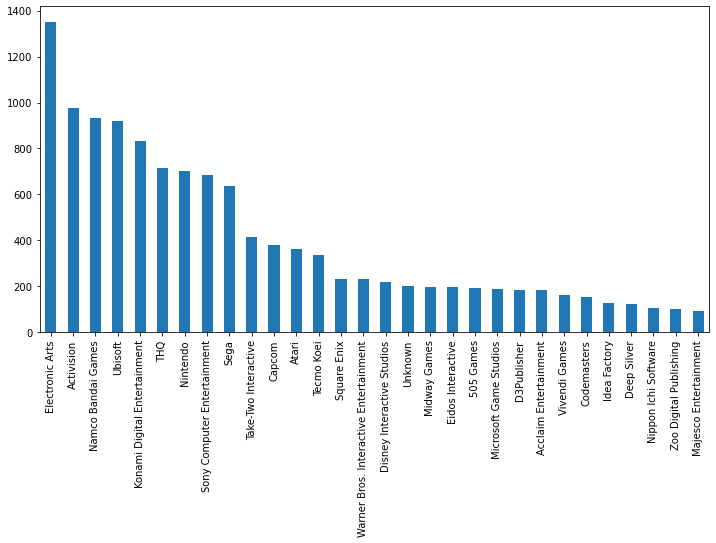

In [327]:
df['Publisher'].value_counts().head(30).plot(kind='bar',figsize=(12,6))

In [401]:
df['Name'].nunique()

11493

We can see that there is a huge number of unique game names, therfore I will plot only the top 50.

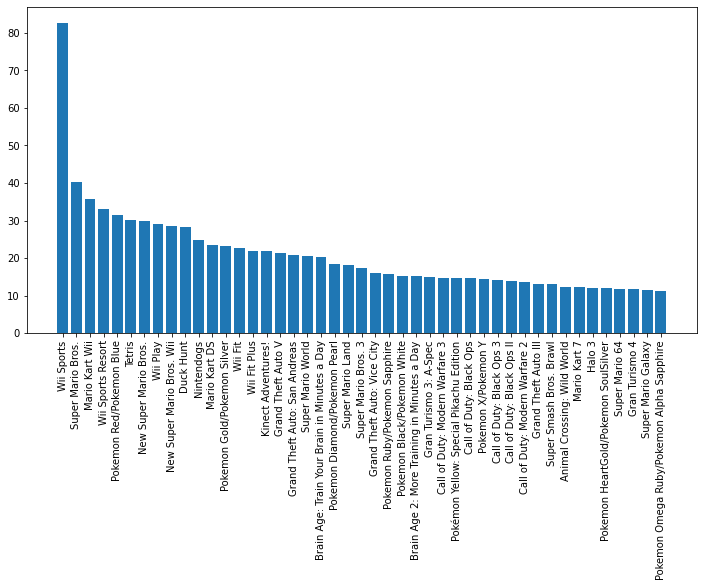

In [397]:
plt.figure(figsize=(12,6))
plt.bar(df['Name'].head(50),df['Global_Sales'].head(50))
plt.xticks(rotation='vertical')
plt.show()

It's easy to see that Wii Sports is at the top by far! amazing.
As a teen I was a huge fan of guitar hero, let's find out how popular it was. 

In [403]:
df[df['Name']=='Guitar Hero']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
658,Guitar Hero,PS2,2005.0,Misc,RedOctane,1.67,0.61,0.03,0.07,2.38


I was sure it would be more popular, but still impresive 658 out of 11493 games!
Let's use sns pairplot to see the cor beween our columns.

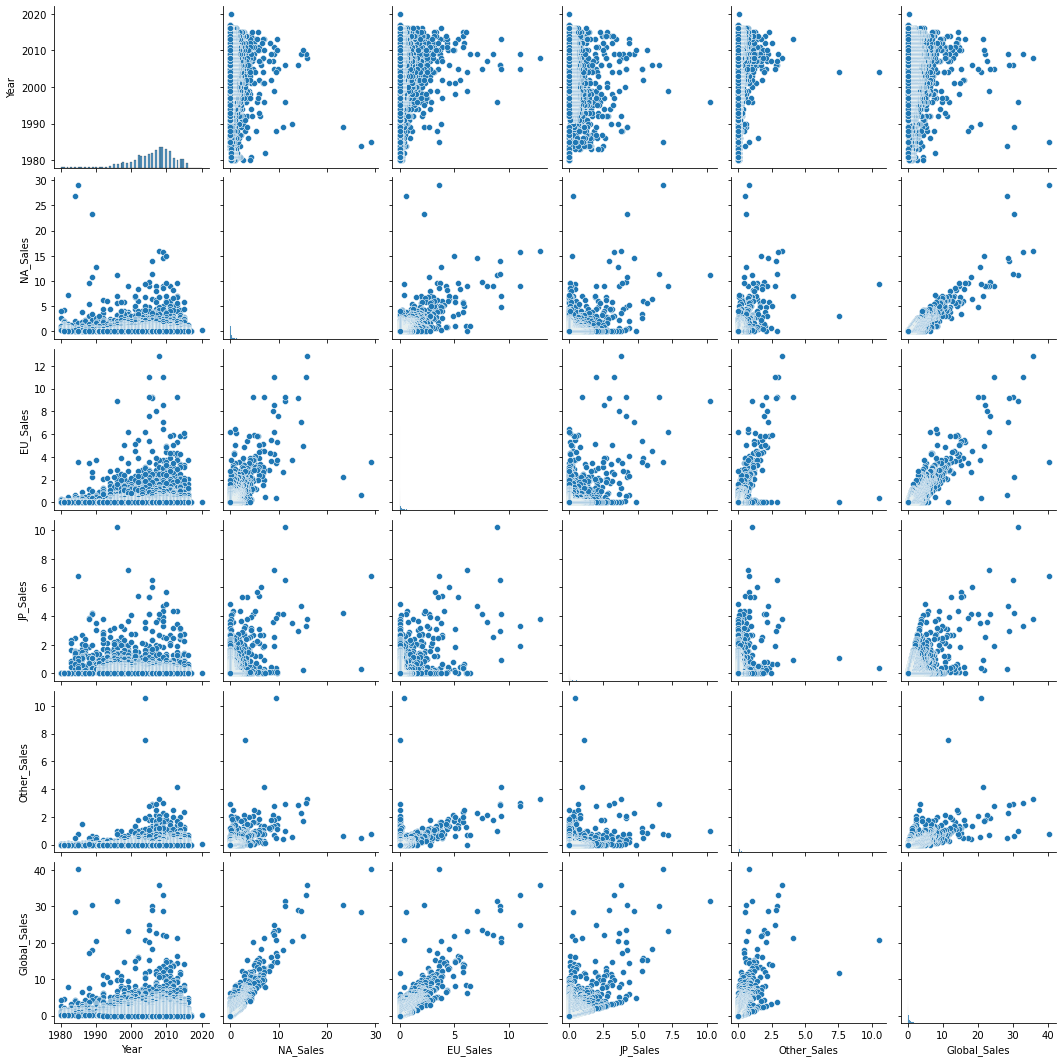

In [408]:
sns.pairplot(df)

From the pairplot we can identify a lot.
<br>A Massive growth on the sales between the years 2000-2010.
<br>A corr close to 1 between global sales to NA and EU sales.
<br>We can't get clear insight of the cor between the JP sales to the other sales.
<br>Now lets plot the best games and their sales per area!


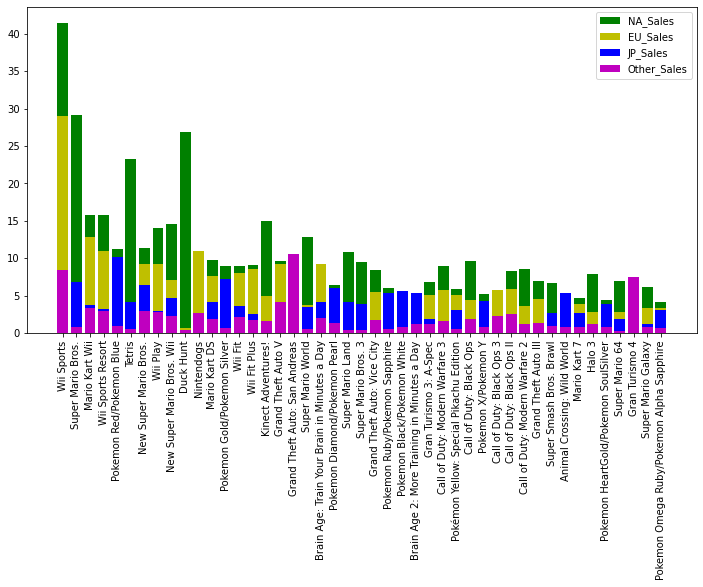

In [422]:
plt.figure(figsize=(12,6))
plt.bar(df['Name'].head(50),df['NA_Sales'].head(50),color='g')
plt.bar(df['Name'].head(50),df['EU_Sales'].head(50),color='y')
plt.bar(df['Name'].head(50),df['JP_Sales'].head(50),color='b')
plt.bar(df['Name'].head(50),df['Other_Sales'].head(50),color='m')
plt.xticks(rotation='vertical')
plt.legend(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.show()

Another way to visualize more then 2 columns is the heatmaps, for those one I will use seaborn.
First lets group our df by Genre and platform too see the global sales per each.

<AxesSubplot:xlabel='Platform', ylabel='Genre'>

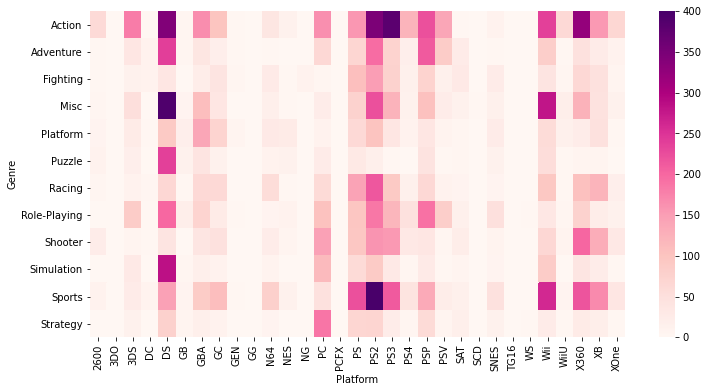

In [335]:
group = df.groupby(by=['Genre','Platform']).count()['Global_Sales'].unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(group,cmap="RdPu")

For example we can see that Music is a the best genre games for DS platform.
Now let's see how the platforms competiton distribute trough the years.

<AxesSubplot:xlabel='Year', ylabel='Platform'>

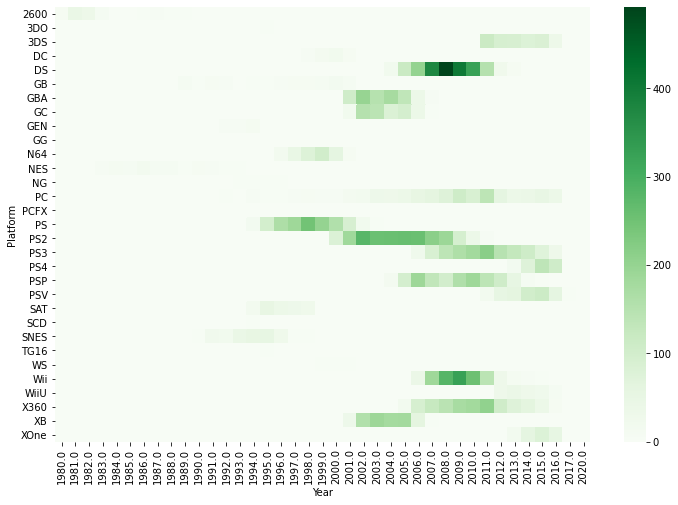

In [428]:
group = df.groupby(by=['Platform','Year']).count()['Global_Sales'].unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(group,cmap="Greens")

It's nice to see how the new ps consoles influenced the old one's sales, the rising of XBOX and WII, and the amazingly speed of growth for DS.

<BarContainer object of 3 artists>

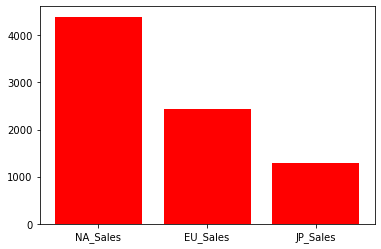

In [235]:
Sales= []
Areas= ['NA_Sales','EU_Sales','JP_Sales']
for i in range(6,9):
     Sales.append(df.iloc[:,i].sum())
plt.bar(x=Areas,height=Sales,color='red')

<BarContainer object of 3 artists>

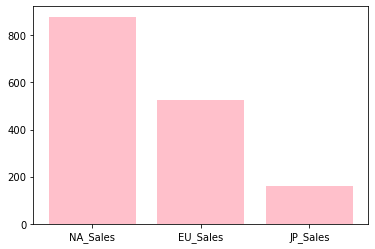

In [248]:
Sales= []
Areas= ['NA_Sales','EU_Sales','JP_Sales']
for i in range(6,9):
     Sales.append(df[df['Genre']=='Action'].iloc[:,i].sum())
Sales
plt.bar(x=Areas,height=Sales,color='pink')

<BarContainer object of 3 artists>

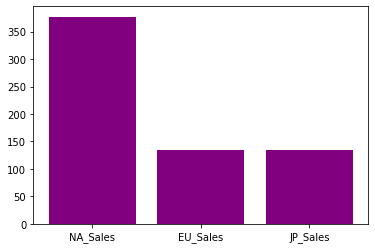

In [340]:
Sales= []
Areas= ['NA_Sales','EU_Sales','JP_Sales']
for i in range(6,9):
     Sales.append(df[df['Genre']=='Sports'].iloc[:,i].sum())
plt.bar(x=Areas,height=Sales,color='purple')

# Thanks for viewing my EDA analysis! 
### Hope you enjoyed!